<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/HZExoplanetClassifiers/DNNClassifier_v1/DNNClassifier_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import os
import pydotplus
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from IPython import display
from IPython.display import Image
from six import StringIO
import pickle
from google.colab import drive

In [ ]:
#pd.options.mode.copy_on_write = True
warnings.simplefilter('ignore')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nasa_exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/HZExoplanetClassifiers/DNNClassifier_v1/NASA_PSCompData_2024.09.15.csv'
nasa_exoplanets_data = pd.read_table(nasa_exoplanets_filename,
                                      skiprows=89,
                                      sep=',',
                                      header=None,
                                      index_col=None,
                                      names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                                'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                                'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                                'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                                'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                                'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                                'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                                'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                                'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                                'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                                'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                      skipfooter=0,
                                      engine='python')

In [ ]:
# Sanity check the first several rows of data to ensure data is read correctly
nasa_exoplanets_data.head()

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag   pl_orbper  \
0                        Xinglong Station                0   323.21000   
1  Thueringer Landessternwarte Tautenburg                0   516.21997   
2       Okayama Astrophysical Observatory                0   186.76000   
3                  W. M. Keck Observatory                0  1765.03890   
4                  Multiple Observatories                0   798.50000   

   pl_orbpererr1  ...  sy_disterr2  sy_vmag  sy_vmagerr1  sy_vmagerr2  \
0        0.06000  ...      -1.9238  4.72307        0.023       -0.023   
1        3.20000  ...      -1.9765  5.01300        0.005       -0.005   
2        0.11000  ...      -0.7140  5.23133        0.023       -0.023   
3        1.67709  ...      -0.0073  6.61935        0.023       -0.023   
4        1.00000  ...      -0.0111  6.21500        0.016       -0.016   

   sy_kmag  sy_kmagerr1  sy_kmagerr2  sy_gaiamag  sy_gaiamagerr1  \
0    2.282        0.346       -0.346     4.44038        0.003848   
1    1.939        0.270       -0.270     4.56216        0.003903   
2    2.331        0.240       -0.240     4.91781        0.002826   
3    4.714        0.016       -0.016     6.38300        0.000351   
4    4.651        0.016       -0.016     6.06428        0.000603   

   sy_gaiamagerr2  
0       -0.003848  
1       -0.003903  
2       -0.002826  
3       -0.000351  
4       -0.000603  

[5 rows x 84 columns]

In [ ]:
# Sanity check the last several rows of data to ensure data is read correctly.
nasa_exoplanets_data.tail()

pl_name hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
5751  ups And b  ups And        2        3  Radial Velocity       1996   
5752  ups And c  ups And        2        3  Radial Velocity       1999   
5753  ups And d  ups And        2        3  Radial Velocity       1999   
5754  ups Leo b  ups Leo        1        1  Radial Velocity       2021   
5755   xi Aql b   xi Aql        1        1  Radial Velocity       2007   

                          disc_facility  pl_controv_flag    pl_orbper  \
5751                   Lick Observatory                0     4.617033   
5752             Multiple Observatories                0   241.258000   
5753             Multiple Observatories                0  1276.460000   
5754  Okayama Astrophysical Observatory                0   385.200000   
5755  Okayama Astrophysical Observatory                0   136.970000   

      pl_orbpererr1  ...  sy_disterr2  sy_vmag  sy_vmagerr1  sy_vmagerr2  \
5751       0.000023  ...     -0.06290  4.09565        0.023       -0.023   
5752       0.064000  ...     -0.06290  4.09565        0.023       -0.023   
5753       0.570000  ...     -0.06290  4.09565        0.023       -0.023   
5754       2.800000  ...     -0.89630  4.30490        0.023       -0.023   
5755       0.110000  ...     -0.55975  4.70964        0.023       -0.023   

      sy_kmag  sy_kmagerr1  sy_kmagerr2  sy_gaiamag  sy_gaiamagerr1  \
5751    2.859        0.274       -0.274     3.98687        0.008937   
5752    2.859        0.274       -0.274     3.98687        0.008937   
5753    2.859        0.274       -0.274     3.98687        0.008937   
5754    2.184        0.248       -0.248     4.03040        0.008513   
5755    2.171        0.220       -0.220     4.42501        0.003837   

      sy_gaiamagerr2  
5751       -0.008937  
5752       -0.008937  
5753       -0.008937  
5754       -0.008513  
5755       -0.003837  

[5 rows x 84 columns]

In [ ]:
# Get the statistics about the data
nasa_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5756 non-null   object 
 1   hostname         5756 non-null   object 
 2   sy_snum          5756 non-null   int64  
 3   sy_pnum          5756 non-null   int64  
 4   discoverymethod  5756 non-null   object 
 5   disc_year        5756 non-null   int64  
 6   disc_facility    5756 non-null   object 
 7   pl_controv_flag  5756 non-null   int64  
 8   pl_orbper        5480 non-null   float64
 9   pl_orbpererr1    4979 non-null   float64
 10  pl_orbpererr2    4979 non-null   float64
 11  pl_orbperlim     5480 non-null   float64
 12  pl_orbsmax       5475 non-null   float64
 13  pl_orbsmaxerr1   2863 non-null   float64
 14  pl_orbsmaxerr2   2863 non-null   float64
 15  pl_orbsmaxlim    5476 non-null   float64
 16  pl_rade          5735 non-null   float64
 17  pl_radeerr1   

In [ ]:
# Only selects exoplanets with pl_controv_flag == 0
nasa_exoplanets_data = nasa_exoplanets_data.loc[(nasa_exoplanets_data['pl_controv_flag'] == 0)]

In [ ]:
nasa_exoplanets_data = nasa_exoplanets_data.loc[
    (~np.isnan(nasa_exoplanets_data['sy_snum'])) & (nasa_exoplanets_data['sy_snum'] == 1)
    & ~np.isnan(nasa_exoplanets_data['st_teff'])
    & ~np.isnan(nasa_exoplanets_data['st_rad'])
    & ~np.isnan(nasa_exoplanets_data['pl_orbsmax'])]

In [ ]:
hwc_exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/HZExoplanetClassifiers/DNNClassifier_v1/hwc-09-06-2024.csv'
hwc_exoplanets_data = pd.read_csv(hwc_exoplanets_filename)
hwc_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


In [ ]:
hwc_exoplanets_data = hwc_exoplanets_data.loc[~np.isnan(hwc_exoplanets_data['P_HABITABLE'])]
hwc_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.1+ MB


In [ ]:
exoplanets_data = pd.merge(nasa_exoplanets_data,
                           hwc_exoplanets_data[['P_HABITABLE']],
                           how="left",
                           left_on=nasa_exoplanets_data['pl_name'].str.lower(),
                           right_on=hwc_exoplanets_data['P_NAME'].str.lower())
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key_0            4712 non-null   object 
 1   pl_name          4712 non-null   object 
 2   hostname         4712 non-null   object 
 3   sy_snum          4712 non-null   int64  
 4   sy_pnum          4712 non-null   int64  
 5   discoverymethod  4712 non-null   object 
 6   disc_year        4712 non-null   int64  
 7   disc_facility    4712 non-null   object 
 8   pl_controv_flag  4712 non-null   int64  
 9   pl_orbper        4670 non-null   float64
 10  pl_orbpererr1    4191 non-null   float64
 11  pl_orbpererr2    4191 non-null   float64
 12  pl_orbperlim     4670 non-null   float64
 13  pl_orbsmax       4712 non-null   float64
 14  pl_orbsmaxerr1   2190 non-null   float64
 15  pl_orbsmaxerr2   2190 non-null   float64
 16  pl_orbsmaxlim    4712 non-null   float64
 17  pl_rade       

In [ ]:
exoplanets_data.to_csv('/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/HZExoplanetClassifiers/DNNClassifier_v1/NasaJoinedWithHWCData-09-15-2024.csv')

In [ ]:
# Drop data fields that are not relevant to the training
training_prep_data = exoplanets_data.drop(['key_0','pl_name', 'hostname', 'sy_snum',
                                            'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                            'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
                                            'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbperlim',
                                            'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                            'pl_radeerr1', 'pl_radeerr2', 'pl_radelim',
                                            'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                            'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim',
                                            'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                            'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                            'pl_insolerr1', 'pl_insolerr2', 'pl_insollim',
                                            'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                            'ttv_flag', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
                                            'st_raderr1', 'st_raderr2', 'st_radlim',
                                            'st_masserr1', 'st_masserr2', 'st_masslim',
                                            'st_meterr1', 'st_meterr2', 'st_metlim',
                                            'st_loggerr1', 'st_loggerr2', 'st_logglim',
                                            'rastr', 'decstr',
                                            'sy_disterr1', 'sy_disterr2', 'sy_vmagerr1', 'sy_vmagerr2',
                                            'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                          axis = 1)

# Drop data fields that are duplicate to others
training_prep_data = training_prep_data.drop(['pl_bmassj', 'pl_radj'], axis = 1)
training_prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       4712 non-null   int64  
 1   pl_orbper     4670 non-null   float64
 2   pl_orbsmax    4712 non-null   float64
 3   pl_rade       4703 non-null   float64
 4   pl_bmasse     4696 non-null   float64
 5   pl_bmassprov  4712 non-null   object 
 6   pl_orbeccen   4381 non-null   float64
 7   pl_insol      3677 non-null   float64
 8   pl_eqt        3843 non-null   float64
 9   st_spectype   1597 non-null   object 
 10  st_teff       4712 non-null   float64
 11  st_rad        4712 non-null   float64
 12  st_mass       4711 non-null   float64
 13  st_met        4542 non-null   float64
 14  st_metratio   4525 non-null   object 
 15  st_logg       4704 non-null   float64
 16  ra            4712 non-null   float64
 17  dec           4712 non-null   float64
 18  sy_dist       4696 non-null 

In [ ]:
training_prep_data['P_HABITABLE'].value_counts()

P_HABITABLE
0.0    4528
2.0      31
1.0      24
Name: count, dtype: int64

In [ ]:
training_prep_data = training_prep_data.loc[~np.isnan(training_prep_data['P_HABITABLE'])]
training_prep_data['hz_label'] = training_prep_data['P_HABITABLE'].apply(np.int64)
training_prep_data.loc[training_prep_data['hz_label'] == 2, 'hz_label'] = 1
training_prep_data['hz_label'].value_counts()

hz_label
0    4528
1      55
Name: count, dtype: int64

In [ ]:
training_prep_data = training_prep_data.drop(['P_HABITABLE'], axis = 1)
training_prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4583 entries, 0 to 4711
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       4583 non-null   int64  
 1   pl_orbper     4546 non-null   float64
 2   pl_orbsmax    4583 non-null   float64
 3   pl_rade       4574 non-null   float64
 4   pl_bmasse     4567 non-null   float64
 5   pl_bmassprov  4583 non-null   object 
 6   pl_orbeccen   4287 non-null   float64
 7   pl_insol      3564 non-null   float64
 8   pl_eqt        3722 non-null   float64
 9   st_spectype   1566 non-null   object 
 10  st_teff       4583 non-null   float64
 11  st_rad        4583 non-null   float64
 12  st_mass       4582 non-null   float64
 13  st_met        4432 non-null   float64
 14  st_metratio   4415 non-null   object 
 15  st_logg       4576 non-null   float64
 16  ra            4583 non-null   float64
 17  dec           4583 non-null   float64
 18  sy_dist       4568 non-null   flo

In [ ]:
# Calculate the missing value % for each data field, then sort data fields by the missing value percentages
missing_value_count = training_prep_data.isnull().sum().sort_values(ascending=False)
missing_value_percentage = ((training_prep_data.isnull().sum() / training_prep_data.isnull().count()) * 100).sort_values(ascending=False)
missing_value_percentage_data = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', '%'])
missing_value_percentage_data.head(50)

Count          %
st_spectype    3017  65.830242
pl_insol       1019  22.234344
pl_eqt          861  18.786821
pl_orbeccen     296   6.458652
st_metratio     168   3.665721
st_met          151   3.294785
pl_orbper        37   0.807331
sy_gaiamag       33   0.720052
pl_bmasse        16   0.349116
sy_dist          15   0.327297
pl_rade           9   0.196378
sy_vmag           7   0.152738
st_logg           7   0.152738
sy_kmag           5   0.109099
st_mass           1   0.021820
dec               0   0.000000
sy_pnum           0   0.000000
st_rad            0   0.000000
ra                0   0.000000
st_teff           0   0.000000
pl_bmassprov      0   0.000000
pl_orbsmax        0   0.000000
hz_label          0   0.000000

In [ ]:
# Drop off data fields with missing value % >= 25%
training_prep_data = training_prep_data.drop(['st_spectype'], axis = 1)
training_prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4583 entries, 0 to 4711
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       4583 non-null   int64  
 1   pl_orbper     4546 non-null   float64
 2   pl_orbsmax    4583 non-null   float64
 3   pl_rade       4574 non-null   float64
 4   pl_bmasse     4567 non-null   float64
 5   pl_bmassprov  4583 non-null   object 
 6   pl_orbeccen   4287 non-null   float64
 7   pl_insol      3564 non-null   float64
 8   pl_eqt        3722 non-null   float64
 9   st_teff       4583 non-null   float64
 10  st_rad        4583 non-null   float64
 11  st_mass       4582 non-null   float64
 12  st_met        4432 non-null   float64
 13  st_metratio   4415 non-null   object 
 14  st_logg       4576 non-null   float64
 15  ra            4583 non-null   float64
 16  dec           4583 non-null   float64
 17  sy_dist       4568 non-null   float64
 18  sy_vmag       4576 non-null   flo

In [ ]:
training_prep_data.select_dtypes(include = ['object']).columns

Index(['pl_bmassprov', 'st_metratio'], dtype='object')

In [ ]:
# Calculate the missing value % for the categorial data field, then sort categorial data fields by the missing value percentages
categorial_data_fields = training_prep_data.select_dtypes(include = ['object'])
missing_value_count = categorial_data_fields.isnull().sum().sort_values(ascending=False)
missing_value_percentage = ((categorial_data_fields.isnull().sum() / categorial_data_fields.isnull().count()) * 100).sort_values(ascending=False)
missing_value_percentage_data = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', '%'])
missing_value_percentage_data.head(50)

Count         %
st_metratio     168  3.665721
pl_bmassprov      0  0.000000

In [ ]:
# Fill in the missing values in categorical data fields with mode
training_prep_data['st_metratio'] = training_prep_data['st_metratio'].fillna(training_prep_data['st_metratio'].mode()[0])

In [ ]:
# Encode categorical data fields to numeric values with Label Encoder
encoders = {}
for column in training_prep_data.select_dtypes(include = ['object']).columns:
    encoders[column] = LabelEncoder()
    training_prep_data[column] = encoders[column].fit_transform(training_prep_data[column])
training_prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4583 entries, 0 to 4711
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       4583 non-null   int64  
 1   pl_orbper     4546 non-null   float64
 2   pl_orbsmax    4583 non-null   float64
 3   pl_rade       4574 non-null   float64
 4   pl_bmasse     4567 non-null   float64
 5   pl_bmassprov  4583 non-null   int64  
 6   pl_orbeccen   4287 non-null   float64
 7   pl_insol      3564 non-null   float64
 8   pl_eqt        3722 non-null   float64
 9   st_teff       4583 non-null   float64
 10  st_rad        4583 non-null   float64
 11  st_mass       4582 non-null   float64
 12  st_met        4432 non-null   float64
 13  st_metratio   4583 non-null   int64  
 14  st_logg       4576 non-null   float64
 15  ra            4583 non-null   float64
 16  dec           4583 non-null   float64
 17  sy_dist       4568 non-null   float64
 18  sy_vmag       4576 non-null   flo

In [ ]:
training_prep_data['pl_bmassprov'].value_counts()

pl_bmassprov
0    2564
1    1321
3     685
2      13
Name: count, dtype: int64

In [ ]:
training_prep_data['st_metratio'].value_counts()

st_metratio
0    4077
1     506
Name: count, dtype: int64

In [ ]:
# Fill in the missing values for the numeric data fields with Multivariate Imputation by Chained Equation (MICE) imputation
# https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00313-w
imputed_training_prep_data = training_prep_data.copy(deep = True)
mice_imputer = IterativeImputer()
imputed_training_prep_data.iloc[:, :] = mice_imputer.fit_transform(training_prep_data)
imputed_training_prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4583 entries, 0 to 4711
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       4583 non-null   int64  
 1   pl_orbper     4583 non-null   float64
 2   pl_orbsmax    4583 non-null   float64
 3   pl_rade       4583 non-null   float64
 4   pl_bmasse     4583 non-null   float64
 5   pl_bmassprov  4583 non-null   int64  
 6   pl_orbeccen   4583 non-null   float64
 7   pl_insol      4583 non-null   float64
 8   pl_eqt        4583 non-null   float64
 9   st_teff       4583 non-null   float64
 10  st_rad        4583 non-null   float64
 11  st_mass       4583 non-null   float64
 12  st_met        4583 non-null   float64
 13  st_metratio   4583 non-null   int64  
 14  st_logg       4583 non-null   float64
 15  ra            4583 non-null   float64
 16  dec           4583 non-null   float64
 17  sy_dist       4583 non-null   float64
 18  sy_vmag       4583 non-null   flo

In [ ]:
habitability_status_counts = Counter(imputed_training_prep_data['hz_label'])
for habitability_status_label, habitability_status_count in habitability_status_counts.items():
    habitability_status_percentage = (habitability_status_count / len(imputed_training_prep_data['hz_label'])) * 100
    print('hz_label=%d, count=%d (%.3f%%)' % (habitability_status_label, habitability_status_count, habitability_status_percentage))

hz_label=0, count=4528 (98.800%)
hz_label=1, count=55 (1.200%)


In [ ]:
features_to_balance, labels_to_balance = imputed_training_prep_data.drop(['hz_label'], axis = 1), imputed_training_prep_data.hz_label

smoteenn = SMOTEENN(random_state=0)
balanced_features, balanced_labels = smoteenn.fit_resample(features_to_balance, labels_to_balance)

habitability_status_counts = Counter(balanced_labels)
for habitability_status_label, habitability_status_count in habitability_status_counts.items():
    habitability_status_percentage = (habitability_status_count / len(balanced_labels)) * 100
    print('hz_label=%d, count=%d (%.3f%%)' % (habitability_status_label, habitability_status_count, habitability_status_percentage))

hz_label=0, count=4420 (49.518%)
hz_label=1, count=4506 (50.482%)


In [ ]:
balanced_training_prep_data = balanced_features
balanced_training_prep_data['hz_label'] = balanced_labels
balanced_training_prep_data.shape

(8926, 22)

<Axes: >

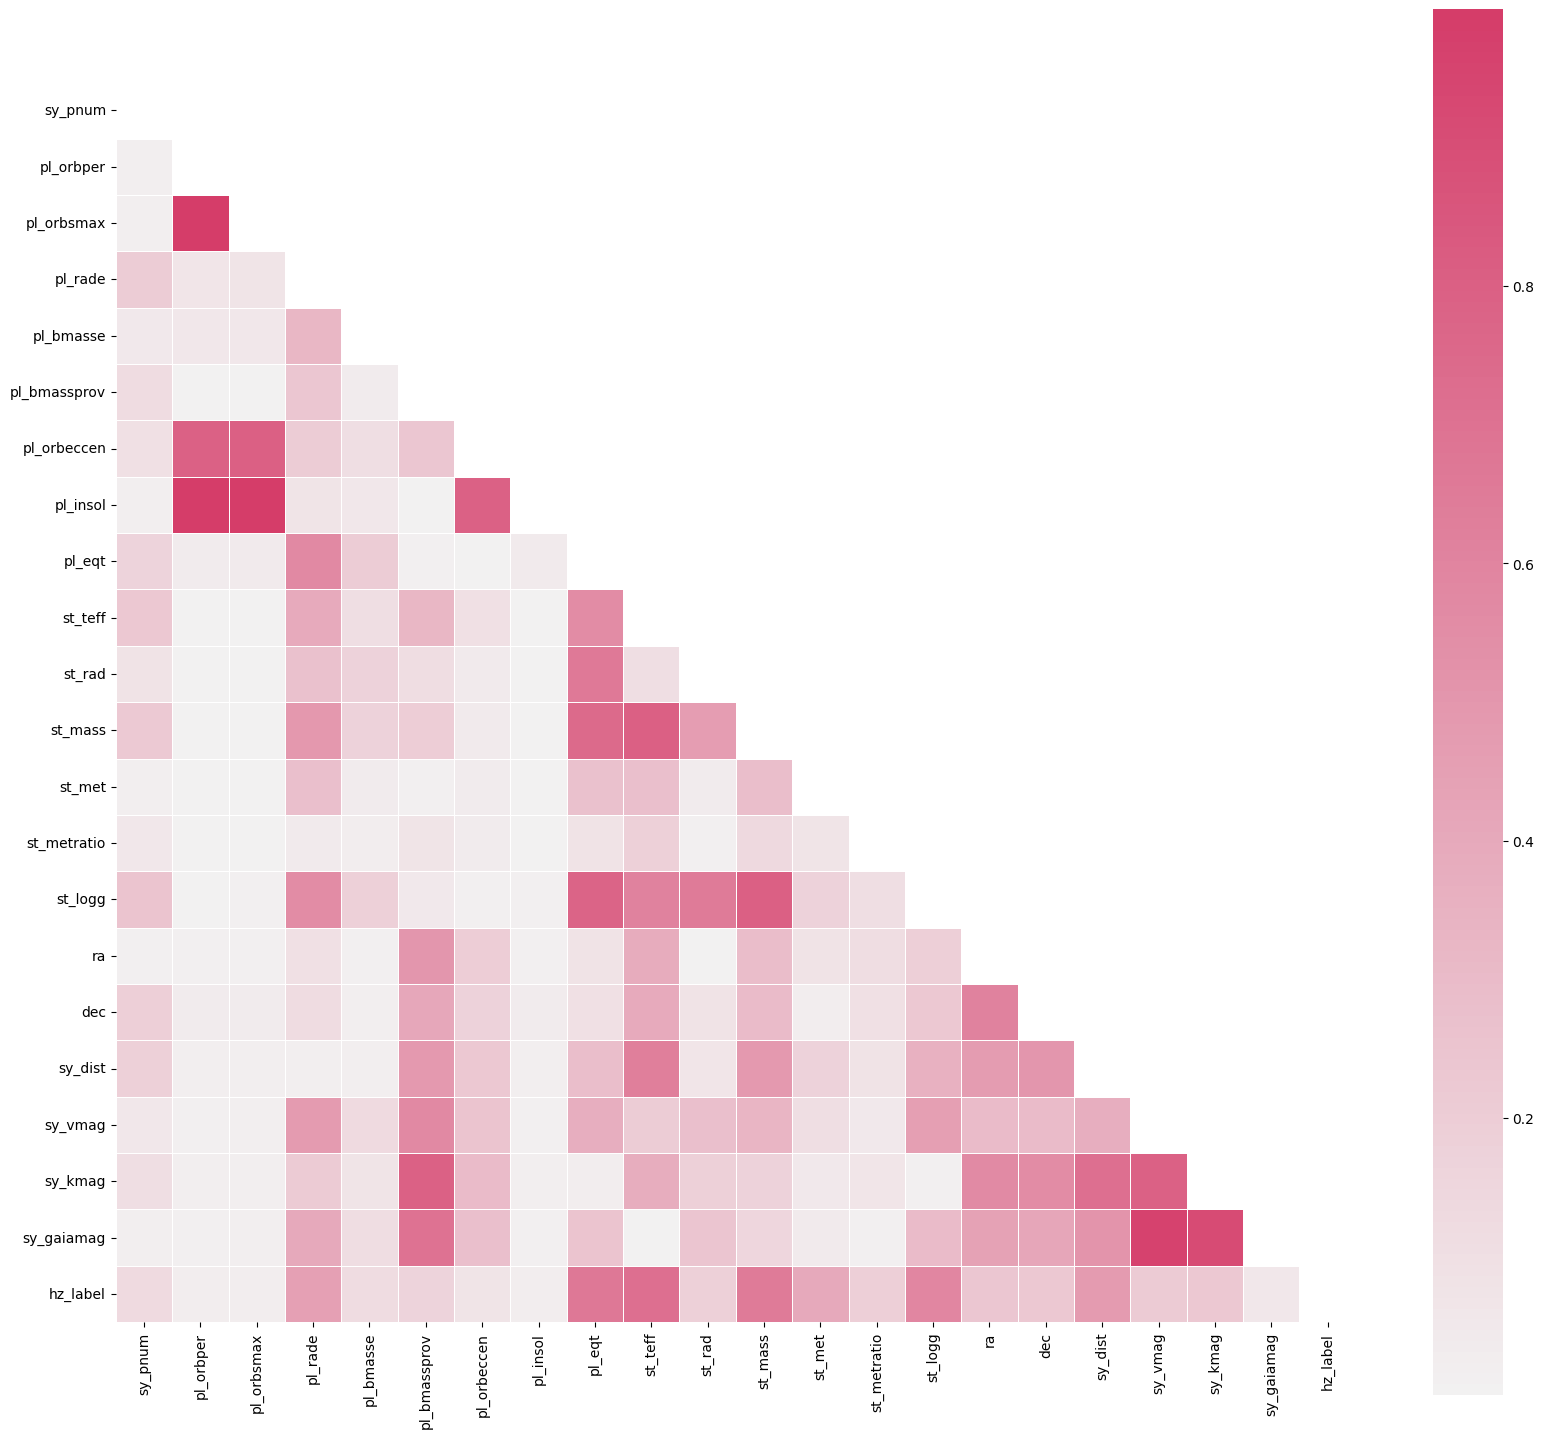

In [ ]:
correlation_matrix = balanced_training_prep_data.corr().abs()

mask = np.triu(np.ones_like(correlation_matrix, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_matrix,
            mask = mask,
            cmap = cmap,
            vmax = None,
            center = 0,
            square = True,
            annot = False,
            linewidths = .5,
            cbar_kws = {"shrink": 0.9})

In [ ]:
# Drop highly correlated data fields
preprocessed_training_data = balanced_training_prep_data.drop(['pl_orbeccen', 'pl_insol', 'sy_gaiamag'], axis = 1)

In [ ]:
preprocessed_training_data = preprocessed_training_data.drop(['pl_eqt'], axis = 1)
features = preprocessed_training_data.drop('hz_label', axis = 1)
labels = preprocessed_training_data['hz_label']
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926 entries, 0 to 8925
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sy_pnum       8926 non-null   int64  
 1   pl_orbper     8926 non-null   float64
 2   pl_orbsmax    8926 non-null   float64
 3   pl_rade       8926 non-null   float64
 4   pl_bmasse     8926 non-null   float64
 5   pl_bmassprov  8926 non-null   int64  
 6   st_teff       8926 non-null   float64
 7   st_rad        8926 non-null   float64
 8   st_mass       8926 non-null   float64
 9   st_met        8926 non-null   float64
 10  st_metratio   8926 non-null   int64  
 11  st_logg       8926 non-null   float64
 12  ra            8926 non-null   float64
 13  dec           8926 non-null   float64
 14  sy_dist       8926 non-null   float64
 15  sy_vmag       8926 non-null   float64
 16  sy_kmag       8926 non-null   float64
dtypes: float64(14), int64(3)
memory usage: 1.2 MB


In [ ]:
# Split the preprocessed_training_data into train and test subsets
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.28,
                                                                            stratify=labels,
                                                                            random_state=42)

print(f"features_train dimensions: {features_train.shape}")
print(f"features_test dimensions: {features_test.shape}")
print(f"labels_train dimensions: {labels_train.shape}")
print(f"labels_test dimensions: {labels_test.shape}")

features_train dimensions: (6426, 17)
features_test dimensions: (2500, 17)
labels_train dimensions: (6426,)
labels_test dimensions: (2500,)


In [ ]:
minMaxScaler = MinMaxScaler()
features_train = minMaxScaler.fit_transform(features_train)
features_test = minMaxScaler.fit_transform(features_test)

In [ ]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    verbose=1,
    restore_best_weights=True)

dnn_classifier = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=[17]),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

dnn_classifier.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

dnn_classifier_training_history = dnn_classifier.fit(
    features_train, labels_train,
    validation_data=(features_test, labels_test),
    shuffle=True,
    batch_size=1024,
    epochs=50,
    callbacks=[early_stopping])

dnn_classifier.summary()

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - binary_accuracy: 0.5224 - loss: 1.8086 - val_binary_accuracy: 0.5088 - val_loss: 1.5947
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5282 - loss: 1.7621 - val_binary_accuracy: 0.5068 - val_loss: 1.5720
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5234 - loss: 1.7508 - val_binary_accuracy: 0.5320 - val_loss: 1.5499
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.5365 - loss: 1.6868 - val_binary_accuracy: 0.5484 - val_loss: 1.5281
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5590 - loss: 1.6411 - val_binary_accuracy: 0.5760 - val_loss: 1.5068
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5553 - loss: 1.6211 - val_binary_accuracy: 0.6308 - val_loss: 1.4857
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5715 - loss: 1.5644 - val_binary_accuracy: 0.7064 - val_loss: 1.4651
Epoch 8/50
7/7 ━━━━━━━━━━━━

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,229 (47.77 KB)

 Trainable params: 4,001 (15.63 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 8,004 (31.27 KB)

Best Validation Loss: 0.7107
Best Validation Accuracy: 0.8944


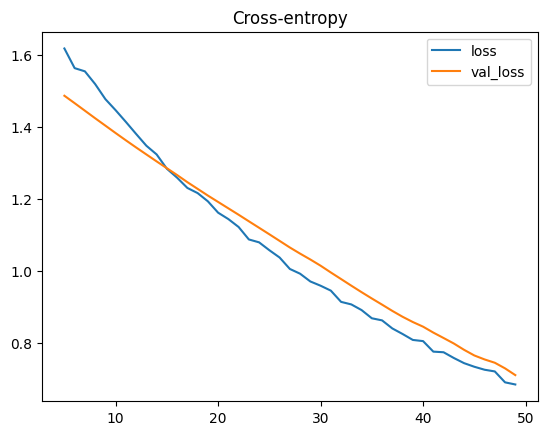

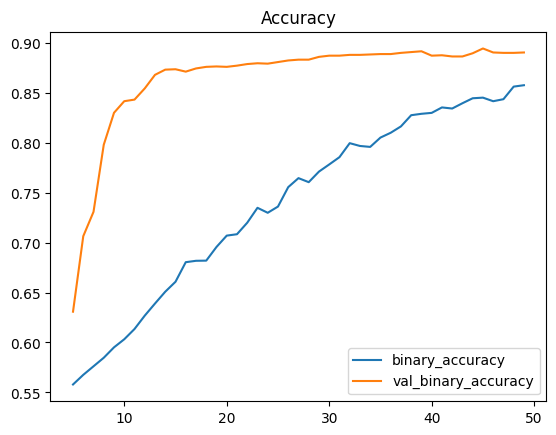

In [ ]:
dnn_classifier_training_history_df = pd.DataFrame(dnn_classifier_training_history.history)

# Start the plot at epoch 5
dnn_classifier_training_history_df.loc[5:, ['loss', 'val_loss']].plot(title="Cross-entropy")
dnn_classifier_training_history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(dnn_classifier_training_history_df['val_loss'].min(),
              dnn_classifier_training_history_df['val_binary_accuracy'].max()))

In [ ]:
dnn_classifier_predictions = dnn_classifier.predict(features_test)
dnn_classifier_predictions

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.25340995],
       [0.72147304],
       [0.26134136],
       ...,
       [0.20020124],
       [0.29823875],
       [0.35896146]], dtype=float32)